# HEART DISEASE PREDICTION USING LOGISTIC REGRESSION

## Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.

In [3]:
#importing relevant libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.impute import KNNImputer #for treating missing values 
sn.set(style="white")
sn.set(style="whitegrid", color_codes=True)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.tools import add_constant as add_constant
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegressionCV #for optimal c parameter 
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import collections
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from imblearn.under_sampling import RandomUnderSampler #undersampling 

 ## Data Quality & Missing Value Assessment

In [5]:
#getting data from an external source
url = 'https://raw.githubusercontent.com/GauravPadawe/Framingham-Heart-Study/master/framingham.csv'
heart_dataset = pd.read_csv(url,index_col=0,parse_dates=[0])
heart_dataset.head()
heart_df = heart_dataset.copy()

## Variables :

Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

### Education :

shows the education level of a person

### Demographic: sex:
 male or female;(Nominal)

### age: age of the patient;
(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

### currentSmoker: 
whether or not the patient is a current smoker (Nominal)

### cigsPerDay: 
the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

## Medical( history):

### BPMeds: 
whether or not the patient was on blood pressure medication (Nominal)

### prevalentStroke: 
whether or not the patient had previously had a stroke (Nominal)

### prevalentHyp:
whether or not the patient was hypertensive (Nominal)

### diabetes: 
whether or not the patient had diabetes (Nominal)

## Medical(current):

### totChol:
total cholesterol level (Continuous)

### sysBP: 
systolic blood pressure (Continuous)

### diaBP:
diastolic blood pressure (Continuous)

### BMI: 
Body Mass Index (Continuous)

### heartRate: 
heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

### glucose:
glucose level (Continuous)

### Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

This is your chance of having heart disease(Prob) or stroke in the next
10 years

So now we have dependent variable which is categorical in nature , so we have a classification problem 

# Data Imputation 

In [6]:
heart_df = heart_df.reset_index(level=0)
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

In [7]:
heart_df.head()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
heart_df.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# The Missing Data Mechanisms

- Missing Completely at Random, MCAR, means there is no relationship between the missingness of the data and any values, observed or missing. Those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than others.It reduces statistical power , it is a strong and unrealistic assumption


- Missing at Random, MAR, means there is a systematic relationship between the propensity of missing values and the observed data, but not unobserved data. Males are less likely to report depression but not on the propensity of their depression.



- Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. This is a case where the people with the lowest education are missing on education or the sickest people are most likely to drop out of the study. People with severe depression are less likely to repot it 




## Dealing with missing data 
- Row deletion 
Pros - simple 
cons - it might introduce bias to the model (if i del. rows but the missing values are MAR then it might delete rows of a particular observation more)

- Mean and Median 
Pros - simple 
cons - reduces the variability of the data (which is one of our assumption )

- Hot Deck method 

Hot deck imputation involves replacing missing values of one or more variables for a non-respondent (called the recipient) with observed values from a respondent (the donor) that is similar to the non-respondent with respect to characteristics observed by both cases

## Consequences of Missing data

Missing data present various problems.
- First, the absence of data reduces statistical power, which refers to the probability that the test will reject the null hypothesis when it is false. 
- Second, the lost data can cause bias in the estimation of parameters. 
- Third, it can reduce the representativeness of the samples

In [6]:
conda install -c conda-forge missingno

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [8]:
import missingno as msno

<AxesSubplot:>

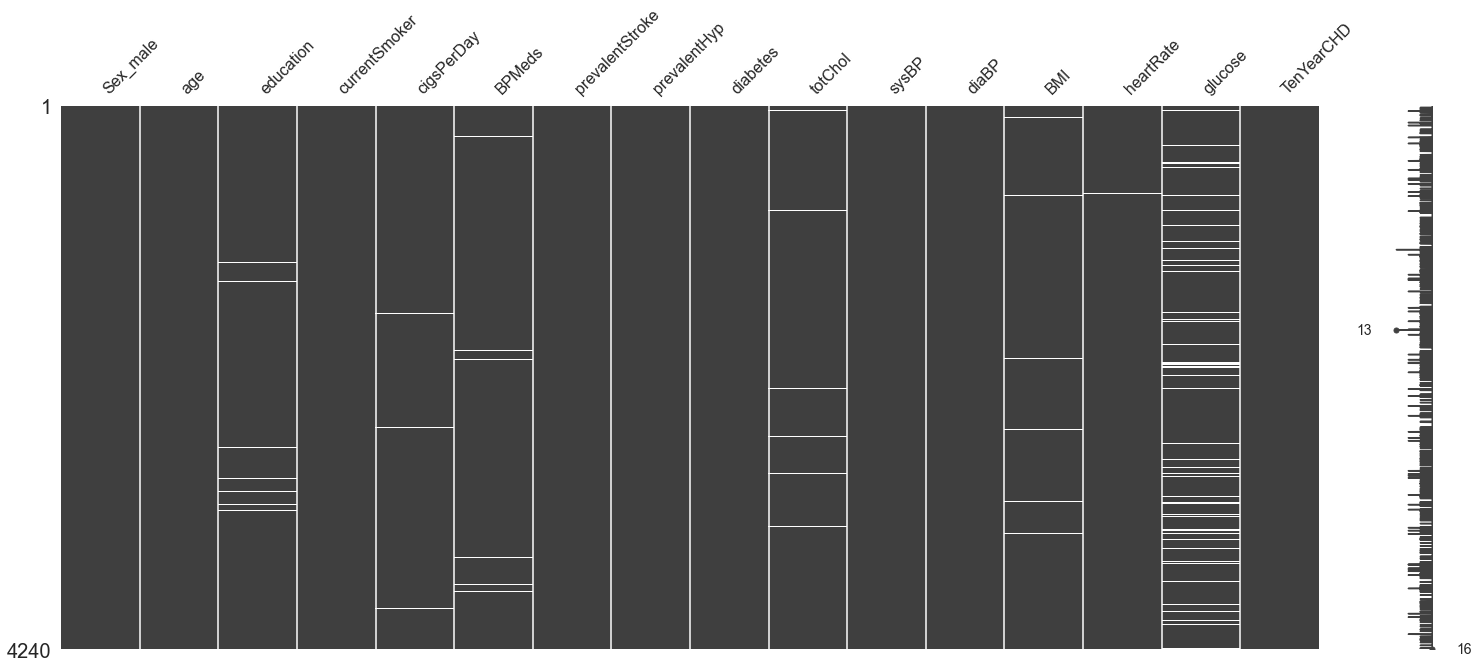

In [9]:
msno.matrix(heart_df)

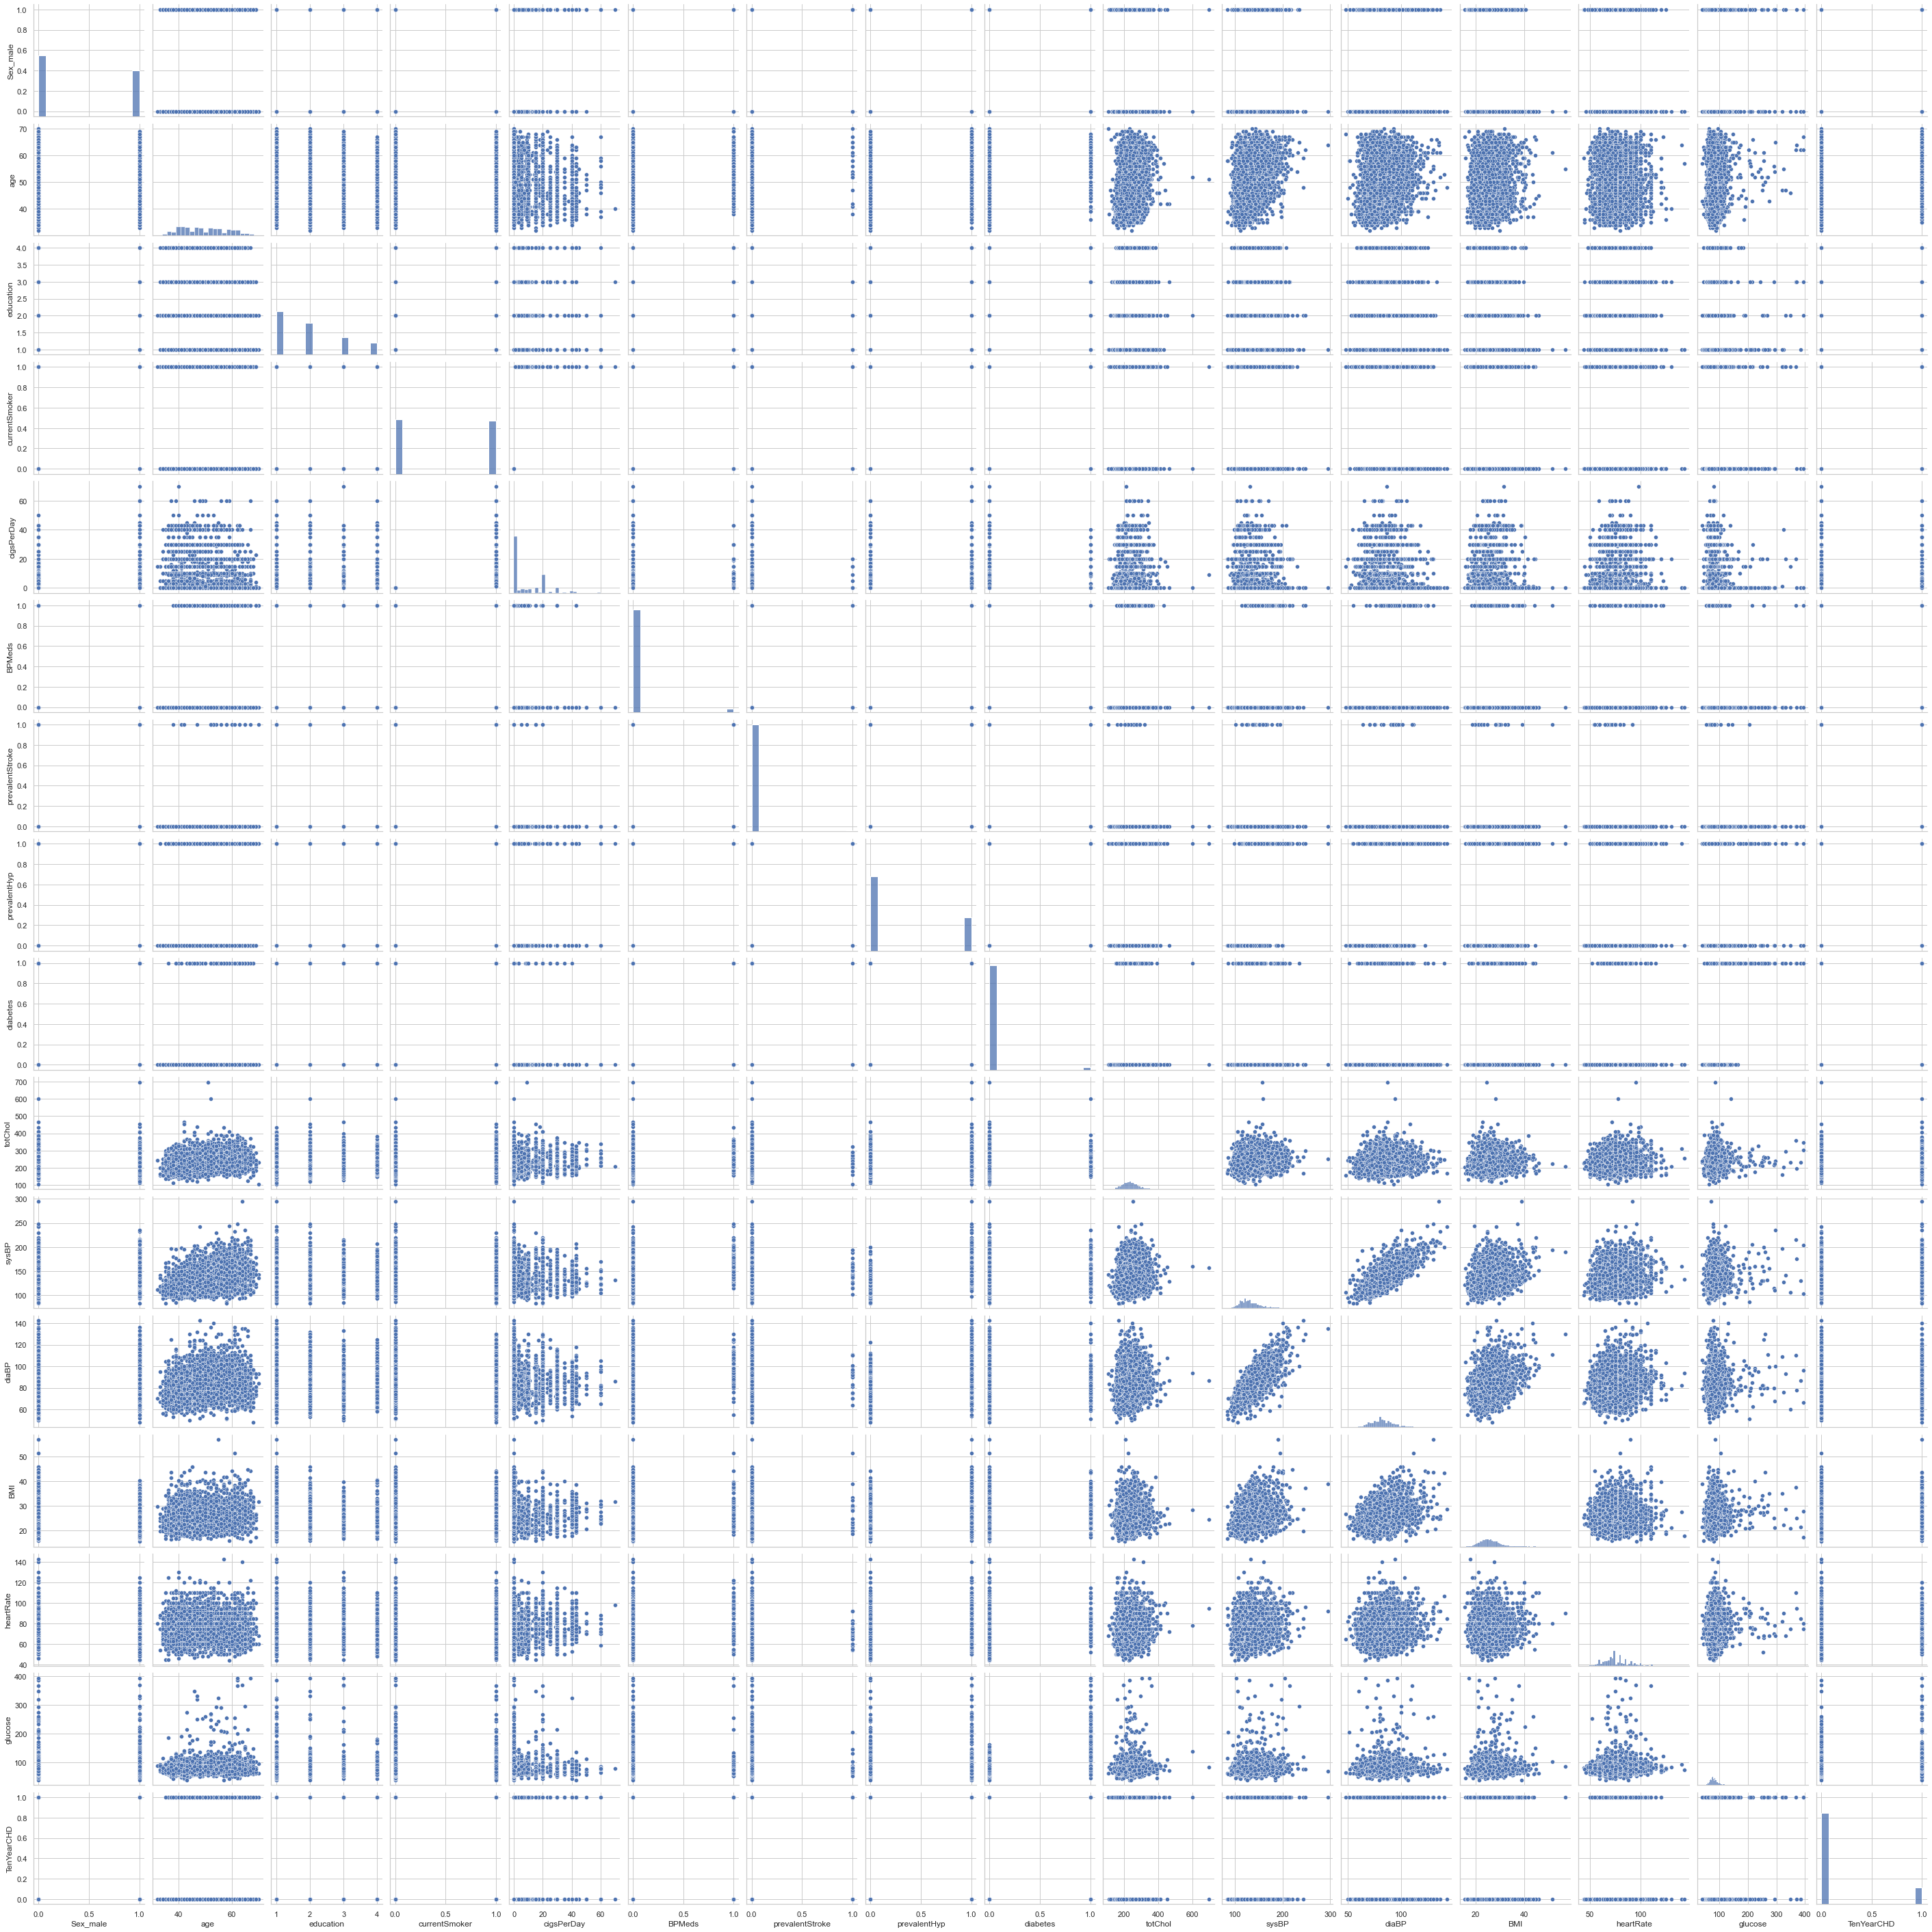

In [10]:
sn.pairplot(heart_df)

 ## Education  - Missing Values

In [9]:
heart_df['education'].isnull().sum()

105

In [10]:
# percent of missing "Education" 
print('Percent of missing "Education" records is %.2f%%' %((heart_df['education'].isnull().sum()/heart_df.shape[0])*100))

Percent of missing "Education" records is 2.48%


~2.48% of entries for passenger age are missing. Let's see what the 'Age' variable looks like in general.

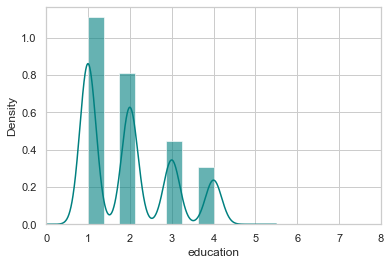

In [11]:
ax = heart_df["education"].hist(bins=8, density=True, stacked=True, color='teal', alpha=0.6)
heart_df["education"].plot(kind='density', color='teal')
ax.set(xlabel='education')
plt.xlim(0,8)
plt.show()

Since the education is right skewed , we cant use the median to replace the missing value

If the datatype of the column is numerical then replace the values with Mean in case of Normal distribution and Median imputatation in case of Skewed distribution. If the datatype of the column is Categorical then the Mode Imputation method is the appropriate method

In [12]:
heart_df["education"].fillna(heart_df["education"].median(skipna=True), inplace=True)

In [15]:
# mean education level
print('The mean of "education" is %.2f' %(heart_df["education"].mean(skipna=True)))
# median age
print('The median of "education" is %.2f' %(heart_df["education"].median(skipna=True)))

The mean of "education" is 1.98
The median of "education" is 2.00


## cigsPerDay - Missing values

In [16]:
# percent of missing "cigsPerday" 
print('Percent of missing "cigsPerday" records is %.2f%%' %((heart_df['cigsPerDay'].isnull().sum()/heart_df.shape[0])*100))

Percent of missing "cigsPerday" records is 0.68%


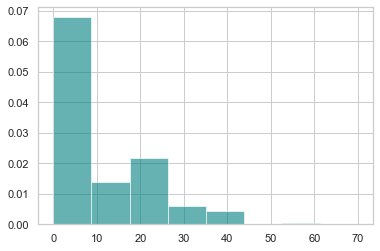

In [17]:
ax = heart_df["cigsPerDay"].hist(bins=8, density=True, stacked=True, color='teal', alpha=0.6)

There are only 2 (0.68%) missing values for "cigsPerDay", so we can just impute with the median value


Text(0.5, 1.0, 'l')

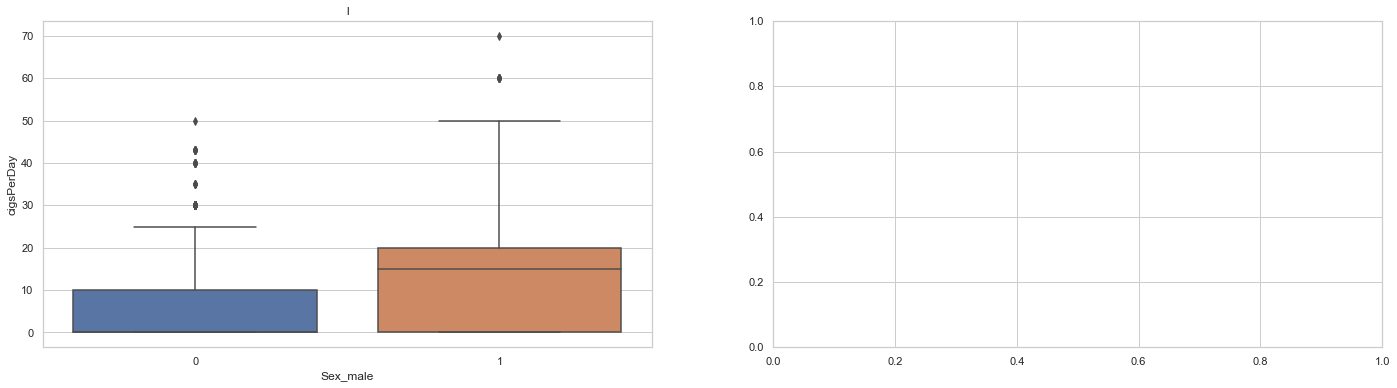

In [18]:
f, axes = plt.subplots(ncols=2, figsize=(24,6))

sn.boxplot(x= "Sex_male", y= "cigsPerDay", data=heart_df, ax=axes[0])
axes[0].set_title('l')

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['cigsPerDay'] = imputer.fit_transform(heart_df[['cigsPerDay']])



As we can clearly see females have a lower rate of having cigs per day than male so we'll replace the values  using KNN imputer method.

This imputer utilizes the k-Nearest Neighbors method to replace the missing values in the datasets with the mean value from the parameter ‘n_neighbors’ nearest neighbors found in the training set. By default, it uses a Euclidean distance metric to impute the missing values



so basically we could see that missing values were not completely random , so we wanted the missing values to be replaced by observed values which were similar to non observed 

## glucose - Missing values

In [20]:
# percent of missing "glucose" 
print('Percent of missing "glucose" records is %.2f%%' %((heart_df['glucose'].isnull().sum()/heart_df.shape[0])*100))

Percent of missing "glucose" records is 9.15%


So the % of missing values in glucose is high , lets see what it looks like 


Text(0.5, 1.0, 'l')

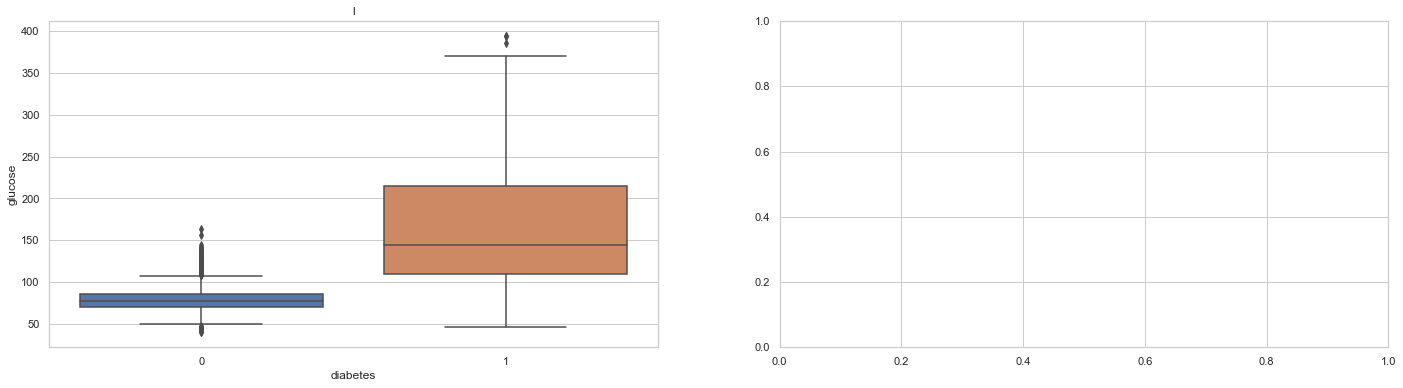

In [21]:
f, axes = plt.subplots(ncols=2, figsize=(24,6))

sn.boxplot(x= "diabetes", y= "glucose", data=heart_df, ax=axes[0])
axes[0].set_title('l')

In [14]:

imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['glucose'] = imputer.fit_transform(heart_df[['glucose']])

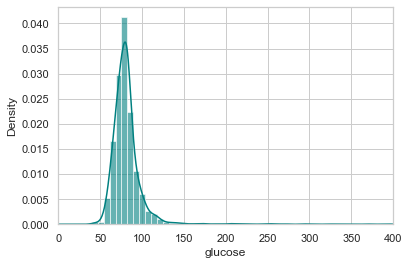

In [23]:
ax = heart_df["glucose"].hist( bins=50,density=True, stacked=True, color='teal', alpha=0.6)
heart_df["glucose"].plot(kind='density', color='teal')
ax.set(xlabel='glucose')
plt.xlim(0,400)
plt.show()

We can most of the values are concentrated around the mean(as it shows a normal distribution) , so we can replace the missing value with the mean 

## totCHOL - Missing values


In [15]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['totChol'] = imputer.fit_transform(heart_df[['totChol']])

## BMI missing values

In [16]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['BMI'] = imputer.fit_transform(heart_df[['BMI']])

## BPMeds missing values

In [17]:
imputer = KNNImputer(n_neighbors=3, weights="uniform")

heart_df['BPMeds'] = imputer.fit_transform(heart_df[['BPMeds']])

## Heart rate missing values

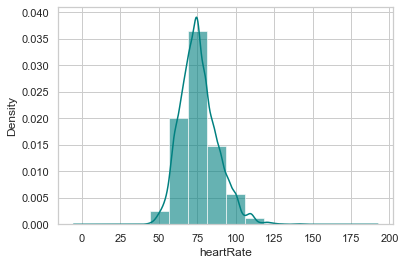

In [27]:
ax = heart_df["heartRate"].hist(bins=8, density=True, stacked=True, color='teal', alpha=0.6)
heart_df["heartRate"].plot(kind='density', color='teal')
ax.set(xlabel='heartRate')

plt.show()

In [18]:
heart_df["heartRate"].fillna(heart_df["heartRate"].median(skipna=True), inplace=True)

In [14]:
#preview adjusted data
heart_df.isnull().sum()

Sex_male           0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [30]:
heart_dataset.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


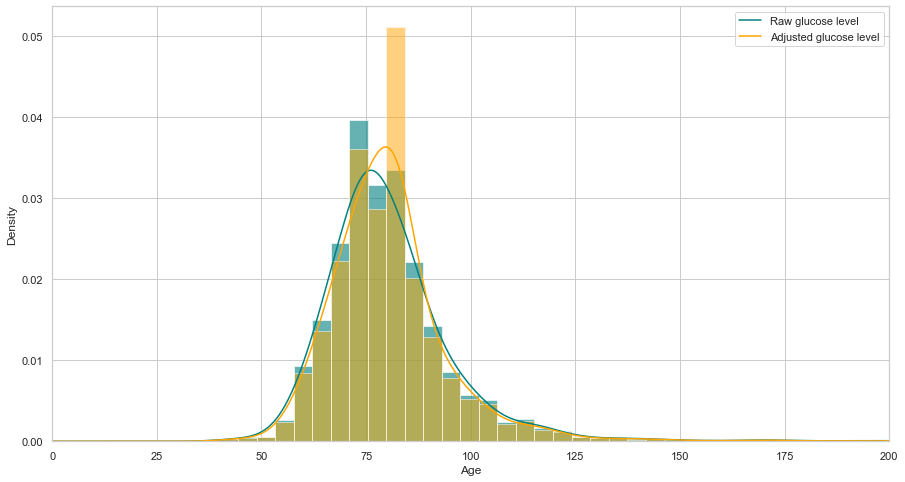

In [31]:
#comparing adjusted glucose level and raw glucose level 

plt.figure(figsize=(15,8))
ax = heart_dataset["glucose"].hist(bins=80, density=True, stacked=True, color='teal', alpha=0.6)
heart_dataset["glucose"].plot(kind='density', color='teal')
ax = heart_df["glucose"].hist(bins=80, density=True, stacked=True, color='orange', alpha=0.5)
heart_df["glucose"].plot(kind='density', color='orange')
ax.legend(['Raw glucose level', 'Adjusted glucose level'])
ax.set(xlabel='Age')
plt.xlim(0,200)
plt.show()

As we can see the data is concentrated around the mean now 

# Exploratory Analysis

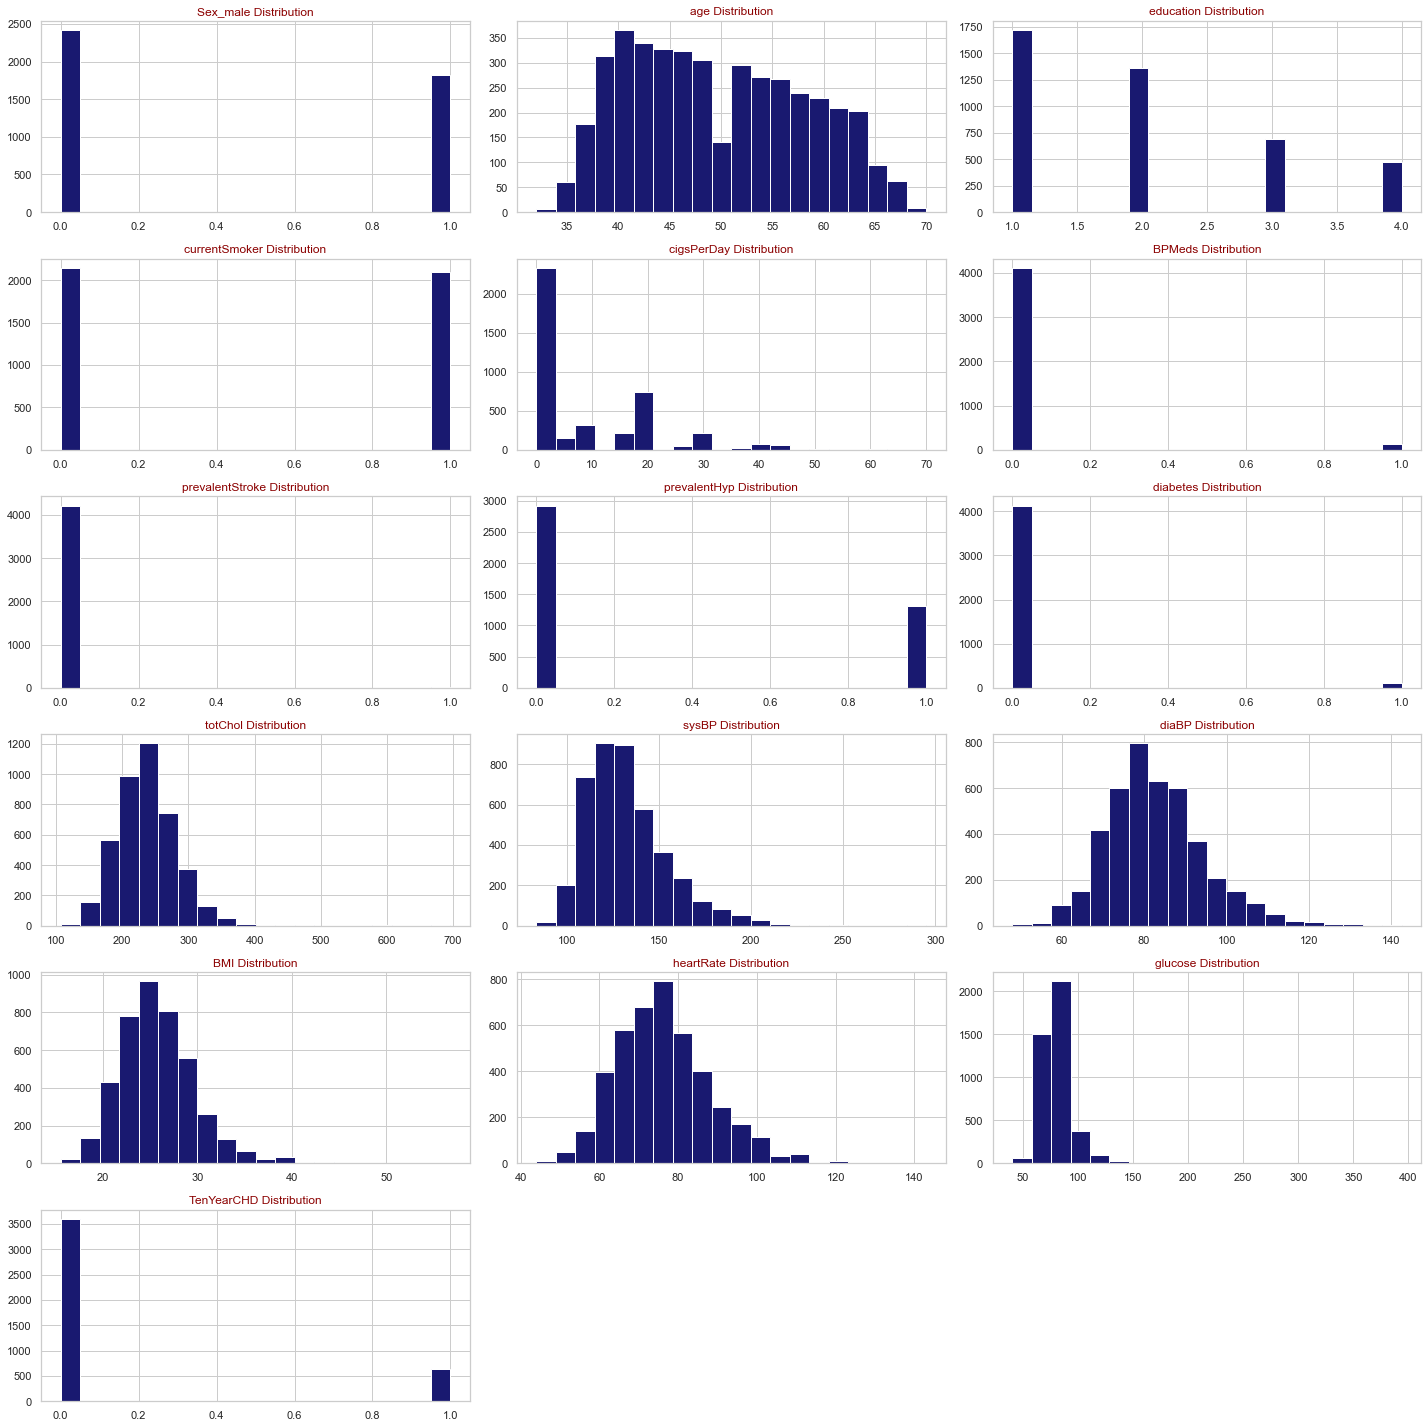

In [32]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

## Detecting outliers - 

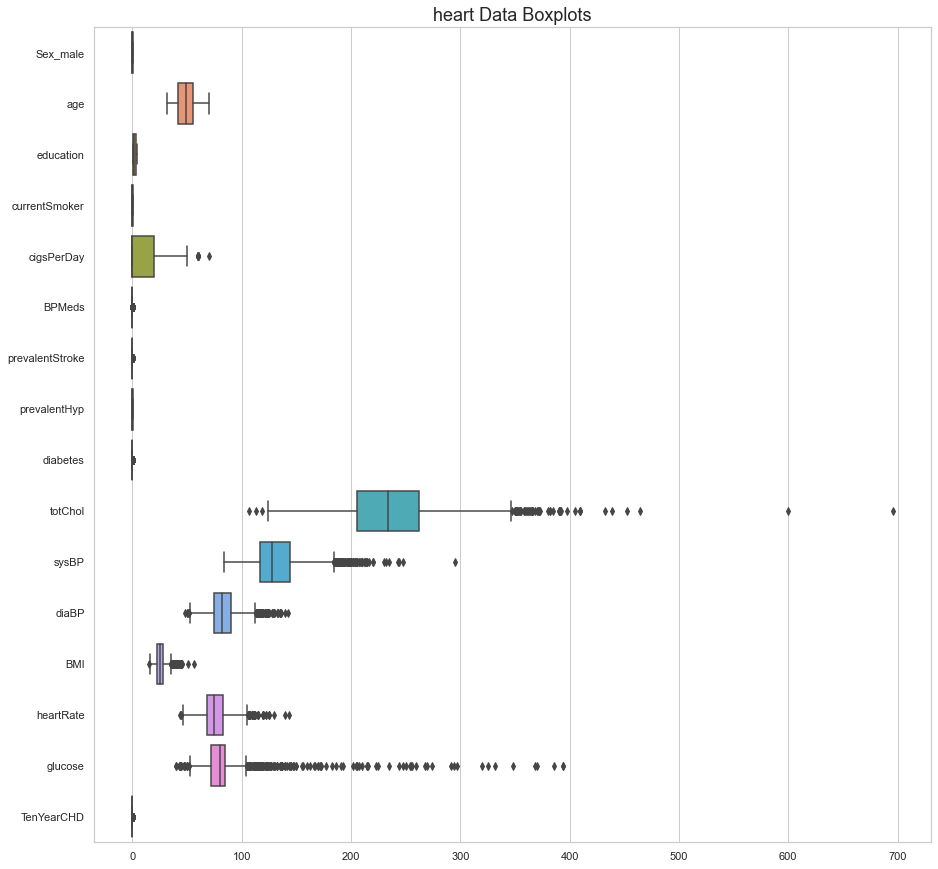

In [33]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (15,15))
ax =sn.boxplot(data = heart_df, orient="h")
ax.set_title('heart Data Boxplots', fontsize = 18)

plt.show()

Observations - 

1. totChol and glucose have high number of outliers 

We can deal with them using the fencing method 

In [34]:
heart_df

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.000000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.000000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.000000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.000000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.000000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,0.029615,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.000000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2.0,0,0.0,0.000000,0,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3.0,0,0.0,0.000000,0,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


## Dealing with outliers

In [35]:
pip install outlier_utils


In [37]:
col

'education'

## we will use fencing method to detect outliers

We can use the interquartile range (IQR), several quartile values, and an adjustment factor to calculate boundaries for what constitutes minor and major outliers. Minor and major denote the unusualness of the outlier relative to the overall distribution of values. Major outliers are more extreme

In [49]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers : {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in heart_df.loc[:,['education', 'cigsPerDay', 'BPMeds', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]:
    heart_d2 = outliers_removal(heart_df[col],str(col),heart_df.loc[:,"Sex_male":"glucose"])

Quartile 25: 1.0 | Quartile 75: 3.0
iqr: 2.0
Cut Off: 3.0
education Lower: -2.0
education Upper: 6.0
education outliers : 0
-----------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 20.0
iqr: 20.0
Cut Off: 30.0
cigsPerDay Lower: -30.0
cigsPerDay Upper: 50.0
cigsPerDay outliers : 12
-----------------------------------------------------------------
Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
BPMeds Lower: 0.0
BPMeds Upper: 0.0
BPMeds outliers : 177
-----------------------------------------------------------------
Quartile 25: 206.0 | Quartile 75: 262.0
iqr: 56.0
Cut Off: 84.0
totChol Lower: 122.0
totChol Upper: 346.0
totChol outliers : 57
-----------------------------------------------------------------
Quartile 25: 117.0 | Quartile 75: 144.0
iqr: 27.0
Cut Off: 40.5
sysBP Lower: 76.5
sysBP Upper: 184.5
sysBP outliers : 126
-----------------------------------------------------------------
Quartile 25: 75.0 | Quartile 75: 90.0
iqr: 15.0

In [21]:
heart_df.shape

(4240, 16)

In [68]:
heart_d2 = heart_df

In [69]:
del heart_d2["prevalentStroke"]

In [70]:
heart_d2

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0.0,0.000000,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2,0,0.0,0.000000,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,1,20.0,0.000000,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3,1,30.0,0.000000,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3,1,23.0,0.000000,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2,1,20.0,0.029615,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,1,15.0,0.000000,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2,0,0.0,0.000000,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3,0,0.0,0.000000,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [22]:
heart_d2[heart_d2.index.duplicated()]

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [60]:
heart_d2['TenYearCHD'] = heart_df['TenYearCHD']

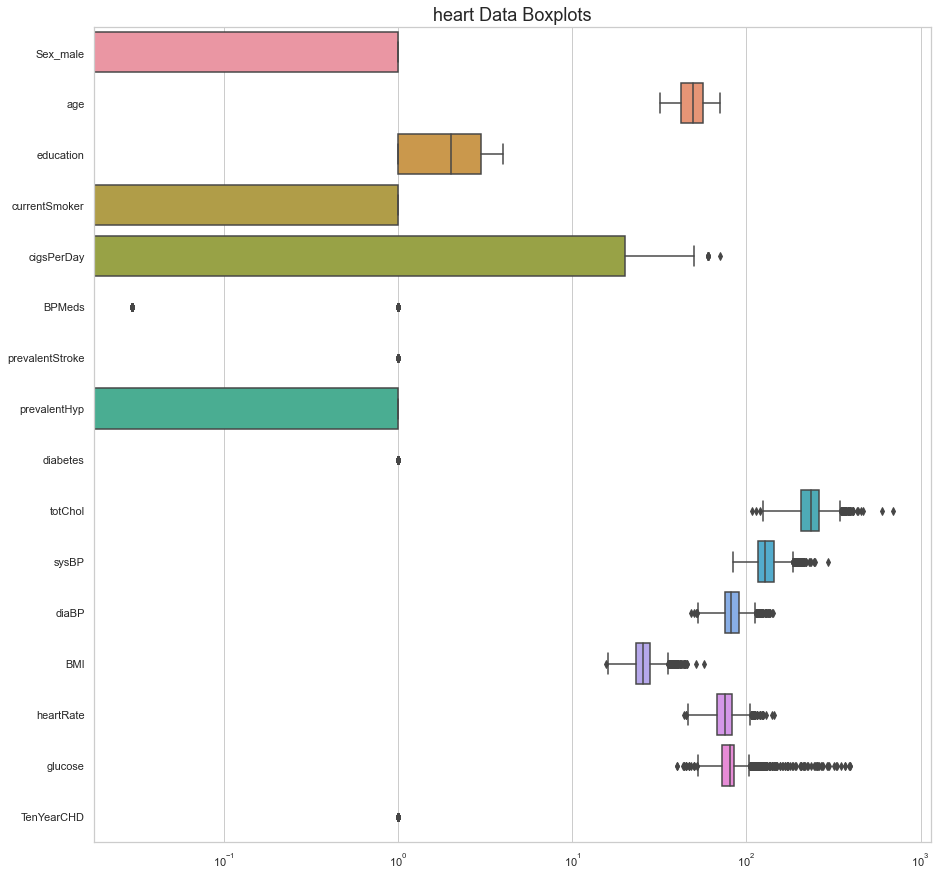

In [51]:
# Plotting Boxplots of the numerical features

plt.figure(figsize = (15,15))
ax =sn.boxplot(data = heart_d2, orient="h")
ax.set_title('heart Data Boxplots', fontsize = 18)

ax.set(xscale="log")
plt.show()

Spearman's rank correlation coefficient measures the monotonic relation between variables , i.e they arrrange the variables in ordered and then measure the relation

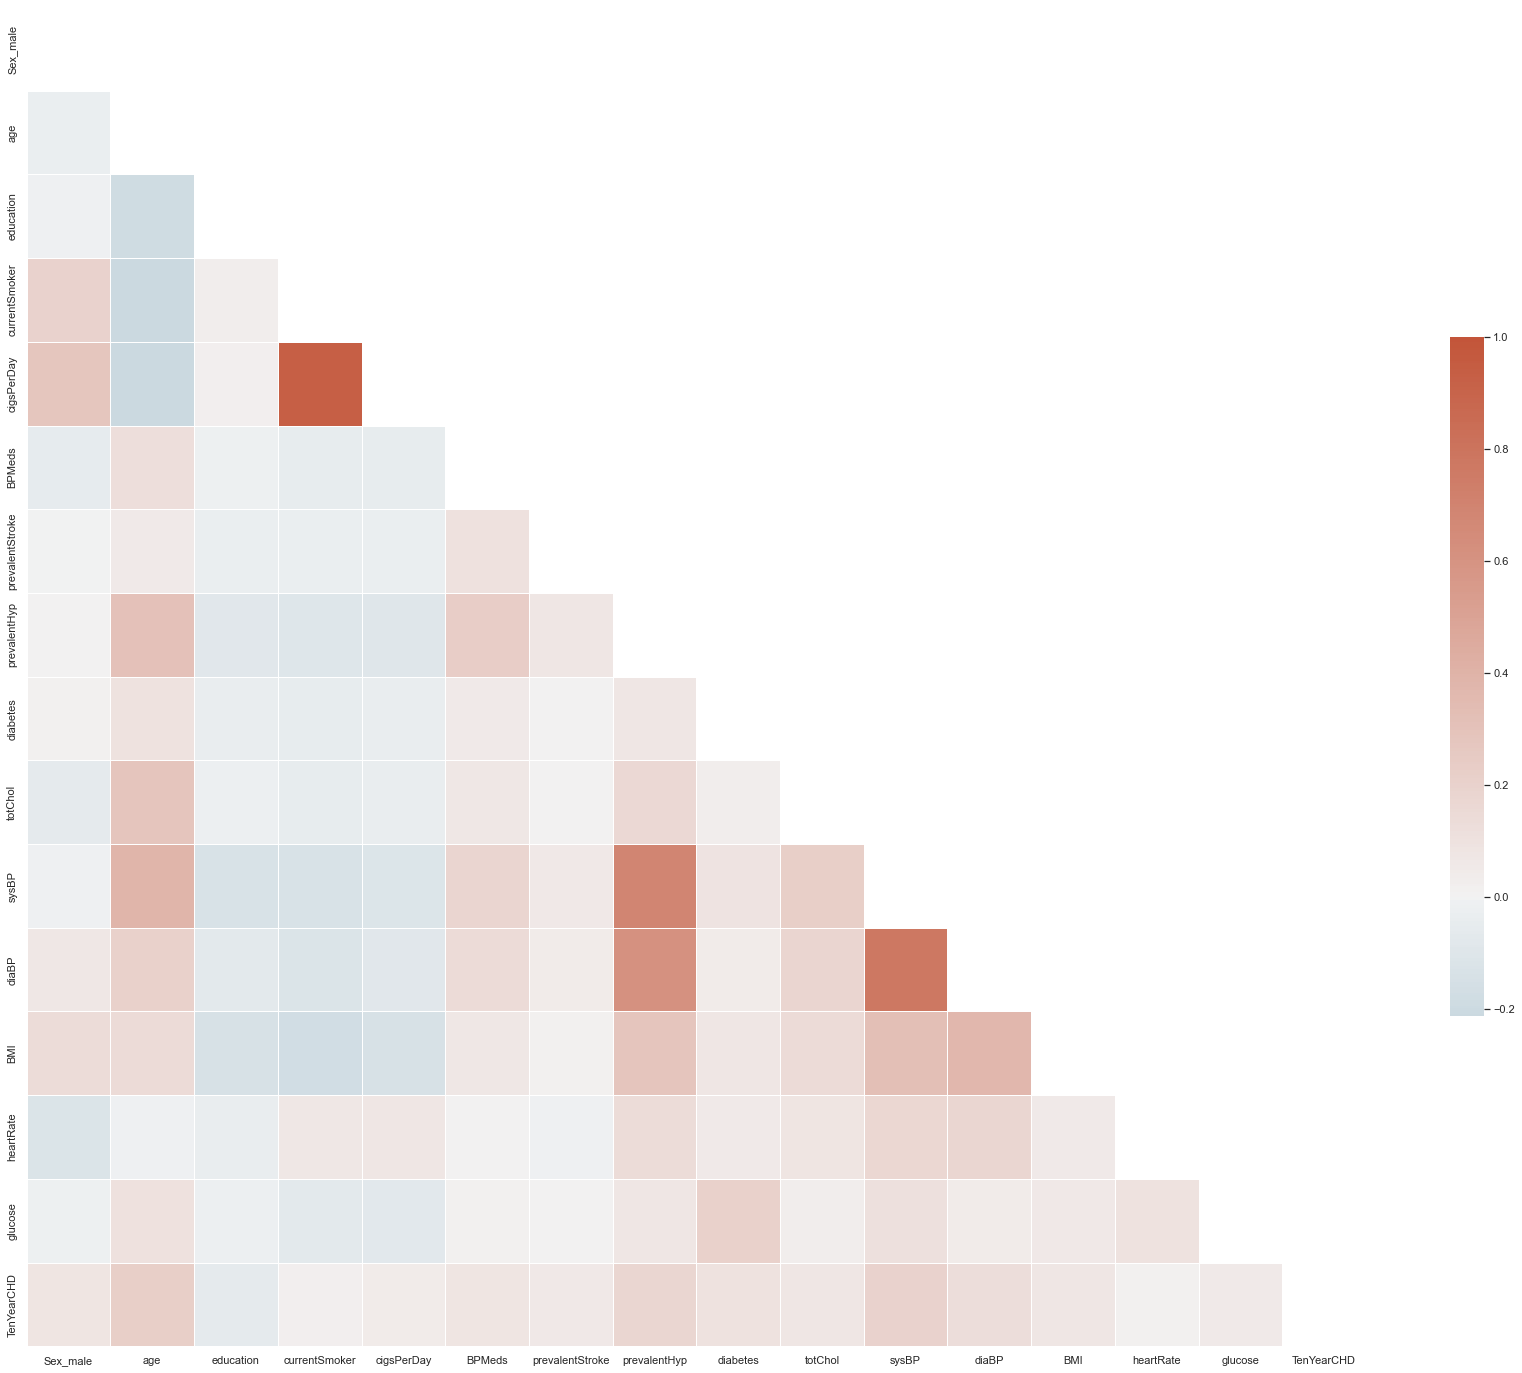

In [65]:
#Checking multicollinearity between diff features
# Correlation Heatmap (Spearman)

f, ax = plt.subplots(figsize=(30, 25))
mat = heart_d2.corr('spearman')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sn.diverging_palette(230, 20, as_cmap=True)
sn.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0,# annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [74]:
heart_d2

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4,0,0.0,0.000000,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2,0,0.0,0.000000,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1,1,20.0,0.000000,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3,1,30.0,0.000000,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3,1,23.0,0.000000,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2,1,20.0,0.029615,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1,1,15.0,0.000000,0,0,210.0,126.5,87.0,19.16,86.0,81.963655,0
4237,0,52,2,0,0.0,0.000000,0,0,269.0,133.5,83.0,21.47,80.0,107.000000,0
4238,1,40,3,0,0.0,0.000000,1,0,185.0,141.0,98.0,25.60,67.0,72.000000,0


In [29]:
heart_df['education'] = heart_df['education'].astype(int)

<AxesSubplot:xlabel='education', ylabel='count'>

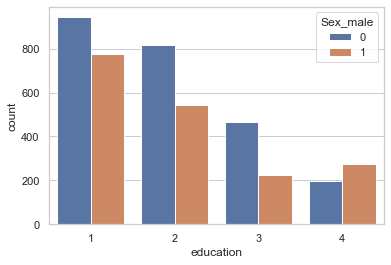

In [34]:
sn.countplot(heart_df['education'] ,hue=heart_df['Sex_male'])

 - Women are more in each category , except higher education 

<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

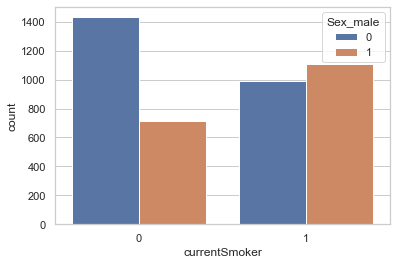

In [53]:
sn.countplot(heart_df['currentSmoker'] ,hue=heart_df['Sex_male'])

<AxesSubplot:xlabel='Sex_male', ylabel='count'>

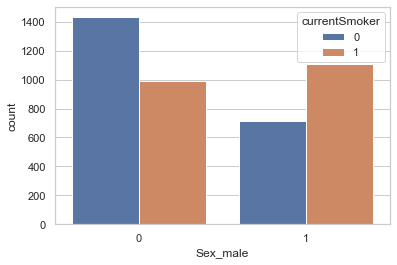

In [54]:
sn.countplot(heart_df['Sex_male'] ,hue=heart_df['currentSmoker'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

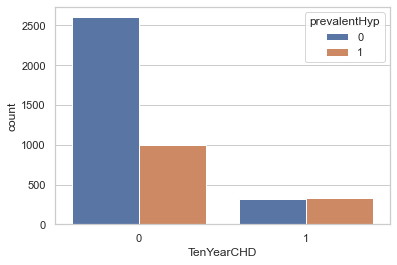

In [73]:
sn.countplot(heart_df['TenYearCHD'] ,hue=heart_df['prevalentHyp'])

<AxesSubplot:xlabel='diabetes', ylabel='count'>

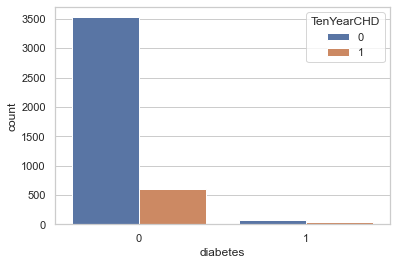

In [75]:
sn.countplot(heart_df['diabetes'],hue=heart_df['TenYearCHD'])

<AxesSubplot:xlabel='BPMeds', ylabel='count'>

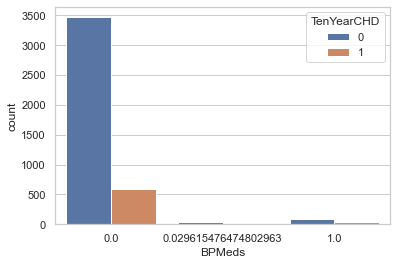

In [77]:
sn.countplot(heart_df['BPMeds'],hue=heart_df['TenYearCHD'])

In [64]:
heart_d2.shape

(4240, 16)

In [65]:
heart_df['prevalentStroke'].value_counts().sum()

4240

<AxesSubplot:xlabel='Sex_male', ylabel='cigsPerDay'>

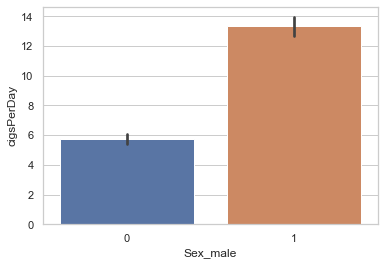

In [36]:
sn.barplot(heart_df['Sex_male'],heart_df['cigsPerDay']  )

- Men smoke more cigg in a day then women

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

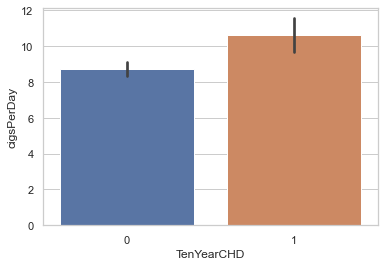

In [80]:
sn.barplot(heart_df['TenYearCHD'] ,heart_df['cigsPerDay'] )

- People who smoke have a higher risk of heart disease

<AxesSubplot:xlabel='heartRate', ylabel='glucose'>

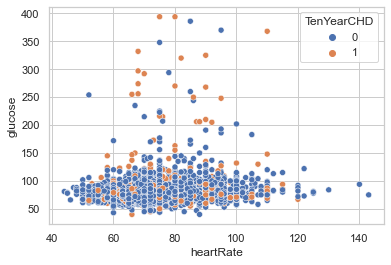

In [44]:
sn.scatterplot(heart_df['heartRate'],heart_df['glucose'],hue=heart_df['TenYearCHD'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

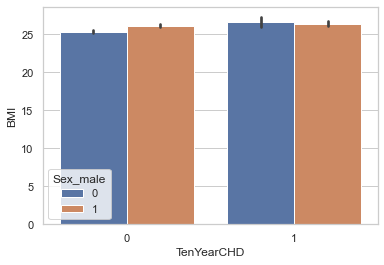

In [50]:
sn.barplot(heart_df['TenYearCHD'],heart_df['BMI'] ,hue = heart_df['Sex_male'])

<AxesSubplot:xlabel='education', ylabel='cigsPerDay'>

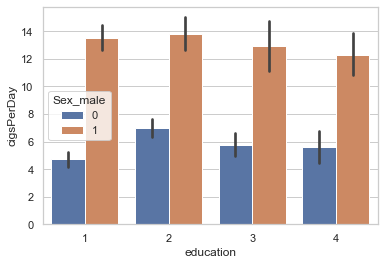

In [84]:
sn.barplot(heart_df['education'],heart_df['cigsPerDay'] ,hue = heart_df['Sex_male'])

<AxesSubplot:xlabel='age', ylabel='BMI'>

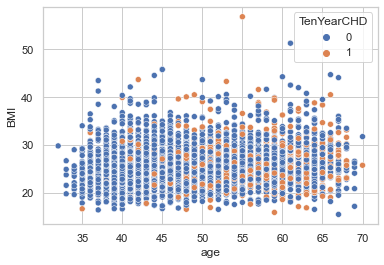

In [48]:
sn.scatterplot(heart_df['age'],heart_df['BMI'],hue=heart_df['TenYearCHD'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

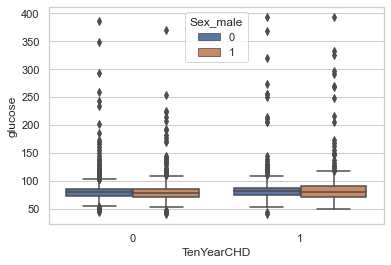

In [52]:
sn.boxplot(heart_df['TenYearCHD'],heart_df['glucose'] ,hue = heart_df['Sex_male'])

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

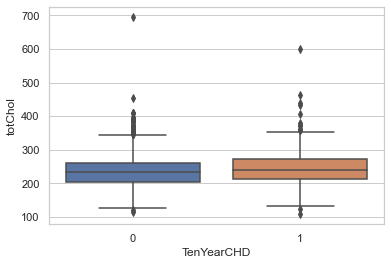

In [100]:
sn.boxplot(heart_df['TenYearCHD'],heart_df['totChol'] )

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

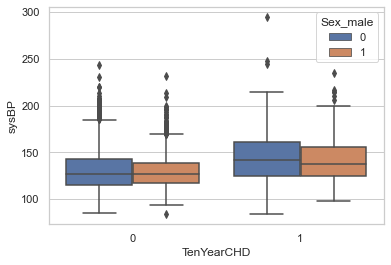

In [56]:
sn.boxplot(heart_df['TenYearCHD'],heart_df['sysBP'] ,hue = heart_df['Sex_male'])

In [45]:
from sklearn.metrics import matthews_corrcoef

In [25]:
heart_df.columns

Index(['Sex_male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [66]:
heart_df['diabetes'].value_counts().sum()

4240

In [67]:
heart_d2['diabetes'].value_counts().sum()

4240

In [68]:
heart_d2.groupby(['diabetes']).size()

diabetes
0    4131
1     109
dtype: int64

In [69]:
heart_df.groupby(['diabetes']).size()

diabetes
0    4131
1     109
dtype: int64

In [70]:
heart_d2.groupby(['diabetes','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
diabetes,,
0,3527,604
1,69,40


In [71]:
heart_d2.groupby(['Sex_male','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
Sex_male,,
0,2119,301
1,1477,343


In [72]:
heart_d2.groupby(['currentSmoker','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
currentSmoker,,
0,1834,311
1,1762,333


In [73]:
heart_d2.groupby(['prevalentStroke','TenYearCHD']).size().unstack(fill_value=0)

TenYearCHD,0,1
prevalentStroke,,
0,3582,633
1,14,11


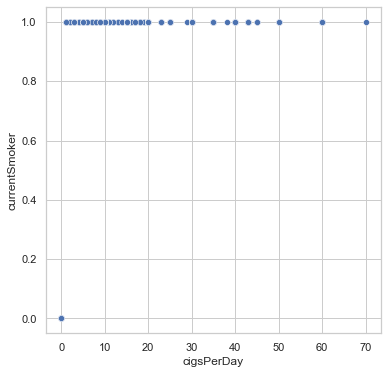

In [74]:
#plotting features which are highly correlated 
#cigsPerDay and Current smoker
plt.figure(figsize=(6, 6))
sn.scatterplot(x = 'cigsPerDay', y = 'currentSmoker', data = heart_d2) #write you code here
plt.show()

Text(0.5, 1.0, 'TenYearCHD vs cigsPerDay')

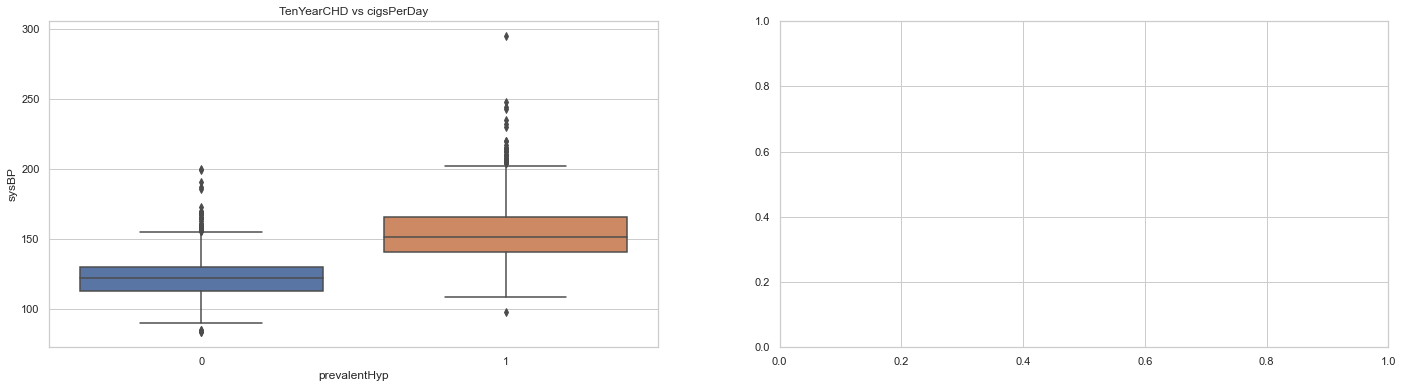

In [75]:
#Comparing SysBP and prevalentHyp as they are highly correlated
f, axes = plt.subplots(ncols=2, figsize=(24,6))

sn.boxplot(x='prevalentHyp', y="sysBP", data=heart_d2, ax=axes[0])
axes[0].set_title('TenYearCHD vs cigsPerDay')


We can clearly see people with prevelantHyp have a higher systolic BP

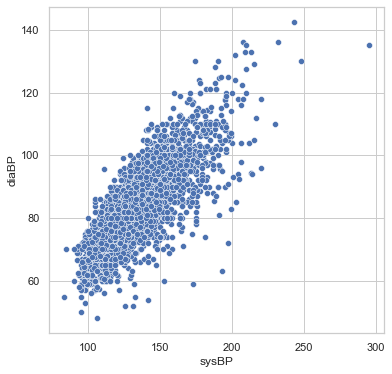

In [50]:
#Relationship between diaBP and sysBP

plt.figure(figsize=(6, 6))
sn.scatterplot(x = 'sysBP', y = 'diaBP', data = heart_d2) #write you code here
plt.show()

SysBP and diaBP  are highly correlated. We would have to treat them afterward

## 1. AGE

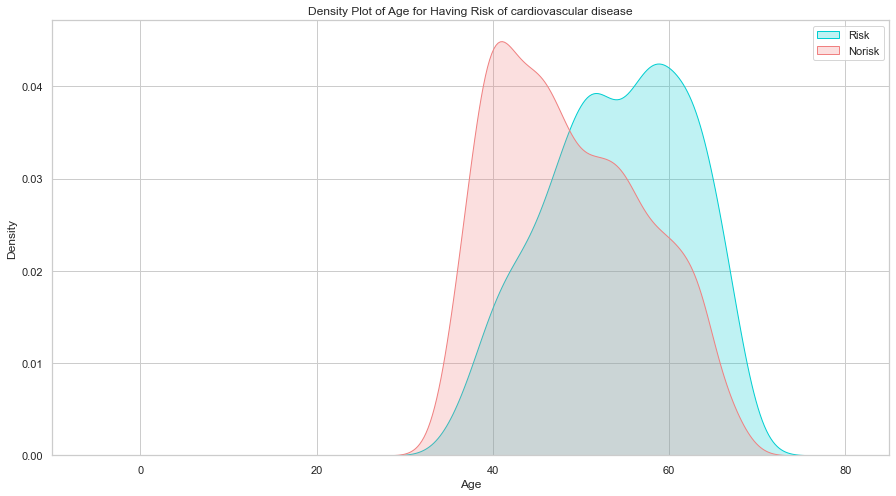

In [51]:
plt.figure(figsize=(15,8))
ax = sn.kdeplot(heart_df["age"][heart_df.TenYearCHD == 1], color="darkturquoise", shade=True)
sn.kdeplot(heart_df["age"][heart_df.TenYearCHD == 0], color="lightcoral", shade=True)
plt.legend(['Risk', 'Norisk'])
plt.title('Density Plot of Age for Having Risk of cardiovascular disease')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

## Observation - 

We can cleary see, people who are older have a higher chance of having a cardiovascular disease 

We can also use boxplot for this purpose , comparing people with risk and no risk 

In [52]:
#we can now compare the average values of the features wrt whether they have the disease or not 
#comparing using boxplot

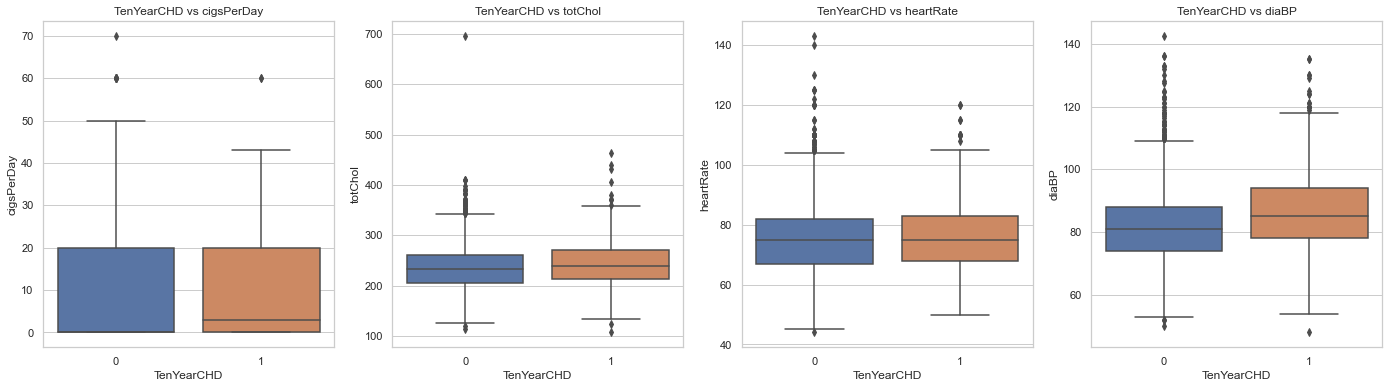

In [53]:
f, axes = plt.subplots(ncols=4, figsize=(24,6))

sn.boxplot(x='TenYearCHD', y="cigsPerDay", data=heart_d2, ax=axes[0])
axes[0].set_title('TenYearCHD vs cigsPerDay')

sn.boxplot(x='TenYearCHD', y="totChol", data=heart_d2, ax=axes[1]) 
axes[1].set_title('TenYearCHD vs totChol')


sn.boxplot(x='TenYearCHD', y="heartRate", data=heart_d2, ax=axes[2])
axes[2].set_title('TenYearCHD vs heartRate')


sn.boxplot(x='TenYearCHD', y="diaBP", data=heart_d2, ax=axes[3])  
axes[3].set_title('TenYearCHD vs diaBP') 


plt.show()

## Observations - 

1. People with risk have similar no. of  cigs per day 

2. People with heart disease have slightl higher chol.

3. People with heart disease have higher heartrate

4. People with heart disease have higher Diabp

In [54]:
#Summary Statistics 
heart_d2.describe()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.00000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000
mean,0.427350,49.363751,1.992459,0.496983,9.101850,0.028024,0.00553,0.300905,0.005782,236.269879,131.676596,82.715938,25.738825,75.663901,78.422549,0.144042
std,0.494756,8.544411,1.006863,0.500054,11.933684,0.163965,0.07417,0.458709,0.075828,43.818613,21.545962,11.785464,4.017385,12.027749,9.868413,0.351177
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,53.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,206.000000,116.000000,74.500000,23.070000,67.250000,72.000000,0.000000
50%,0.000000,48.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,234.000000,128.000000,82.000000,25.365000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.00000,1.000000,0.000000,262.000000,142.500000,89.000000,27.940000,82.000000,84.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.00000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,104.000000,1.000000


<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

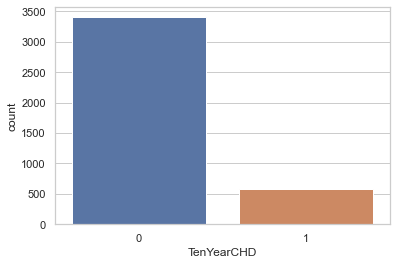

In [55]:
sn.countplot(x='TenYearCHD',data=heart_d2)

In [56]:
heart_df.TenYearCHD.value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

Our classes are imbalanced, and the ratio of no risk to risk  is 161:899. Before we go ahead to balance the classes, let’s do some more exploration.

In [57]:
heart_d2.groupby('TenYearCHD').mean()

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
TenYearCHD,,,,,,,,,,,,,,,
0,0.409692,48.599706,2.013803,0.491630,8.801218,0.022677,0.003818,0.269604,0.005580,234.908453,129.878120,82.037445,25.628754,75.563583,78.348228
1,0.532286,53.904014,1.865620,0.528796,10.888328,0.059802,0.015707,0.486911,0.006981,244.360027,142.363874,86.747818,26.392910,76.260035,78.864193


In [85]:
heart_d2.isnull().sum()

Sex_male         0
age              0
education        0
currentSmoker    0
cigsPerDay       0
BPMeds           0
prevalentHyp     0
diabetes         0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

## adding constant to the model 

In [86]:
from statsmodels.tools import add_constant as add_constant
heart_d2  = add_constant(heart_d2)
heart_d2.head()

,const,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,4,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,2,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,3,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,3,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# SMOTE
SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates the virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.
More Deep Insights of how SMOTE Algorithm work !

- Step 1: Setting the minority class set A, for each $x \in A$, the k-nearest neighbors of x are obtained by calculating the Euclidean distance between x and every other sample in set A.
- Step 2: The sampling rate N is set according to the imbalanced proportion. For each $x \in A$, N examples (i.e x1, x2, …xn) are randomly selected from its k-nearest neighbors, and they construct the set $A_1$ .
- Step 3: For each example $x_k \in A_1$ (k=1, 2, 3…N), the following formula is used to generate a new example:$x' = x + - - -- rand(0, 1) * \mid x - x_k \mid$
- in which rand(0, 1) represents the random number between 0 and 1.


In [87]:
X = heart_d2.loc[:, heart_d2.columns != 'TenYearCHD']
y = heart_d2.loc[:, heart_d2.columns == 'TenYearCHD']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['TenYearCHD'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['TenYearCHD']==0]))
print("Number of subscription",len(os_data_y[os_data_y['TenYearCHD']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['TenYearCHD']==1])/len(os_data_X))

length of oversampled data is  5040
Number of no subscription in oversampled data 2520
Number of subscription 2520
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that we over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Feature Selection 
## 1. Using Backward elemination 

## Baseline model 

In [88]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.588996
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.150      
Dependent Variable: TenYearCHD       AIC:              5967.0789  
Date:               2023-01-19 09:26 BIC:              6064.9563  
No. Observations:   5040             Log-Likelihood:   -2968.5    
Df Model:           14               LL-Null:          -3493.5    
Df Residuals:       5025             LLR p-value:      3.1430e-215
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -7.1415   0.4902 -14.5688 0.0000 -8.1022 -6.1807
Sex_male          -0.3266   0.0710  -4.5981 0.0000 -0

The results above show some of the attributes with P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease

## Checking Multicollinearity 

In [102]:
del os_data_X["const"]

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(os_data_X))

          feature        VIF
0        Sex_male   1.946201
1             age  45.110280
2       education   4.676711
3   currentSmoker   4.727634
4      cigsPerDay   4.433085
5          BPMeds   1.148209
6    prevalentHyp   2.541570
7        diabetes   2.476457
8         totChol  32.921220
9           sysBP  72.969498
10            BMI  43.675963
11      heartRate  40.483128
12        glucose  20.410388


- We can remove diaBP since its value is greater than 0.10 and it is higly correlated with other dependent variables
- Most studies show a greater risk of stroke and heart disease related to higher systolic pressures compared with elevated diastolic pressures

In [95]:
del os_data_X["diaBP"]

In [96]:
os_data_X

,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose
0,0,52,4,1,20.000000,0.0,0,0,236.699523,110.000000,22.520000,75.000000,81.963655
1,1,37,2,1,20.000000,0.0,0,0,272.000000,114.500000,27.600000,63.000000,57.000000
2,1,57,1,0,0.000000,0.0,1,0,176.000000,134.000000,38.140000,68.000000,94.000000
3,1,39,2,0,0.000000,0.0,0,0,235.000000,120.000000,27.230000,62.000000,87.000000
4,1,47,3,0,0.000000,0.0,0,1,199.000000,161.000000,29.170000,58.000000,81.963655
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,1,61,3,1,23.633954,0.0,1,0,202.908930,192.181256,26.874862,78.633954,81.998233
5036,0,40,2,1,20.492942,0.0,0,0,270.950706,138.056352,27.382460,80.098588,82.261212
5037,0,47,1,0,0.000000,0.0,0,0,240.664479,128.198688,27.303843,76.260542,83.575988
5038,0,42,1,0,0.000000,0.0,0,0,174.812722,111.556184,22.594997,80.587988,65.962544


In [101]:
print(checking_vif(os_data_X))

          feature         VIF
0           const  202.494808
1        Sex_male    1.195687
2             age    1.323070
3       education    1.089883
4   currentSmoker    2.709454
5      cigsPerDay    2.745947
6          BPMeds    1.100254
7    prevalentHyp    2.043159
8        diabetes    2.503916
9         totChol    1.092181
10          sysBP    2.296505
11            BMI    1.172591
12      heartRate    1.090294
13        glucose    2.550030


Still some of the variables are highly correlated , we will make model again and check for significant variables

## Model 2

In [98]:
os_data_X  = add_constant(os_data_X)

In [99]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.590065
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.149      
Dependent Variable: TenYearCHD       AIC:              5975.8538  
Date:               2023-01-19 09:28 BIC:              6067.2061  
No. Observations:   5040             Log-Likelihood:   -2973.9    
Df Model:           13               LL-Null:          -3493.5    
Df Residuals:       5026             LLR p-value:      7.0819e-214
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -6.7102   0.4703 -14.2679 0.0000 -7.6320 -5.7884
Sex_male          -0.2916   0.0701  -4.1623 0.0000 -0

Using the spearman's rank correlation coefficient we can that age and cholestrol of a person are higly correlated 

In [69]:
## Removing age as a feature due to its high multicollinearity and high p value 

In [70]:
del os_data_X["glucose"]
del os_data_X["BMI"]

## Model 3

In [91]:
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.588996
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.150      
Dependent Variable: TenYearCHD       AIC:              5967.0789  
Date:               2023-01-19 09:27 BIC:              6064.9563  
No. Observations:   5040             Log-Likelihood:   -2968.5    
Df Model:           14               LL-Null:          -3493.5    
Df Residuals:       5025             LLR p-value:      3.1430e-215
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
const             -7.1415   0.4902 -14.5688 0.0000 -8.1022 -6.1807
Sex_male          -0.3266   0.0710  -4.5981 0.0000 -0

In [93]:
del os_data_X["const"]

In [94]:
print(checking_vif(os_data_X))

          feature         VIF
0        Sex_male    2.002270
1             age   45.884551
2       education    4.775028
3   currentSmoker    4.728447
4      cigsPerDay    4.449180
5          BPMeds    1.148671
6    prevalentHyp    2.542994
7        diabetes    2.496699
8         totChol   33.212153
9           sysBP  142.130322
10          diaBP  135.790550
11            BMI   47.675652
12      heartRate   42.077389
13        glucose   20.415071


In [108]:
col_list = os_data_X.columns.tolist()

In [109]:
col_list

['Sex_male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'BMI',
 'heartRate',
 'glucose']

In [104]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 5040
Model:                          Logit   Df Residuals:                     5026
Method:                           MLE   Df Model:                           13
Date:                Thu, 19 Jan 2023   Pseudo R-squ.:                  0.1487
Time:                        09:36:16   Log-Likelihood:                -2973.9
converged:                       True   LL-Null:                       -3493.5
Covariance Type:            nonrobust   LLR p-value:                7.082e-214
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.7102      0.470    -14.268      0.000      -7.632      -5.788
Sex_male         -0.2916      0.070     -4.162      0.000      -0.429      -0.154
age               0.0625      0.004     14.057      0.000       0.054       0.071
education        -0.3003      0.035     -8.494      0.000      -0.370      -0.231
currentSmoker    -1.1158      0.110    -10.140      0.000      -1.331      -0.900
cigsPerDay        0.0672      0.005     13.986      0.000       0.058       0.077
BPMeds            0.5306      0.210      2.523      0.012       0.118       0.943
prevalentHyp     -0.6276      0.096     -6.560      0.000      -0.815      -0.440
diabetes         -0.8739      0.293     -2.980      0.003      -1.449      -0.299
totChol           0.0010      0.001      1.358      0.175      -0.000       0.003
sysBP             0.0207      0.002      9.732      0.000       0.017       0.025
BMI               0.0247      0.009      2.799      0.005       0.007       0.042
heartRate        -0.0042      0.003     -1.460      0.144      -0.010       0.001
glucose           0.0099      0.002      5.607      0.000       0.006       0.013
=================================================================================
"""

In [105]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

               CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const              0.000485       0.003063    0.001218   0.000
Sex_male           0.651199       0.857013    0.747052   0.000
age                1.055268       1.073823    1.064505   0.000
education          0.690994       0.793715    0.740575   0.000
currentSmoker      0.264097       0.406523    0.327660   0.000
cigsPerDay         1.059516       1.079671    1.069546   0.000
BPMeds             1.125680       2.567166    1.699943   0.012
prevalentHyp       0.442607       0.643988    0.533885   0.000
diabetes           0.234878       0.741459    0.417316   0.003
totChol            0.999545       1.002508    1.001025   0.175
sysBP              1.016685       1.025206    1.020937   0.000
BMI                1.007440       1.042960    1.025046   0.005
heartRate          0.990286       1.001428    0.995841   0.144
glucose            1.006486       1.013504    1.009989   0.000


# Interpretation

- This fitted model shows that, holding all other features constant, the odds of getting diagnosed with heart disease for males (sex_male = 1)over that of females (sex_male = 0) is 0.591191 on an average. In terms of percent change, we can say that being a male decreases your odds of having a heart risk by  40.89%.

- The coefficient for age says that, holding all others constant, we will see 4% increase in the odds of getting diagnosed with CDH for a one year increase in age on an average.


Similarly , with every extra cigarette one smokes thers is a 7% increase in the odds of CDH on an average.

For Total cholosterol level and glucose level there is no significant change.



logit(p)=log(p/(1−p))=β0+β1∗Sexmale+β2∗age+β3∗cigsPerDay+β4∗totChol+β5∗sysBP+β6∗glucose

# Logistic Regression Model Fitting And Evaluation

In [110]:
logreg=LogisticRegression()
logreg.fit(os_data_X,os_data_y)
y_pred=logreg.predict(X_test[col_list])

In [111]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test[col_list], y_test)))

Accuracy of logistic regression classifier on test set: 0.63


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[694 382]
 [ 86 110]]


In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      1076
           1       0.22      0.56      0.32       196

    accuracy                           0.63      1272
   macro avg       0.56      0.60      0.53      1272
weighted avg       0.79      0.63      0.68      1272



<AxesSubplot:>

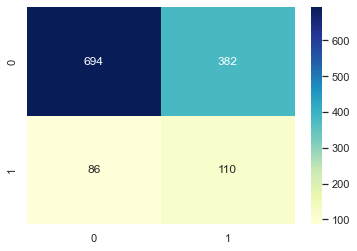

In [114]:
sn.heatmap(confusion_matrix,annot=True,fmt='d',cmap="YlGnBu")

The confusion matrix shows 658+4 = 662 correct predictions and 88+1= 89 incorrect ones.

True Positives: 108

True Negatives: 636

False Positives: 371 (Type I error)

False Negatives: 79 ( Type II error)

In [115]:
cm = confusion_matrix

In [116]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [117]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.6320754716981132 
 The Missclassification = 1-Accuracy =  0.3679245283018868 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.5612244897959183 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.6449814126394052 
 Positive Predictive value = TP/(TP+FP) =  0.22357723577235772 
 Negative predictive Value = TN/(TN+FN) =  0.8897435897435897 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.5808312853937385 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.6802917132270776


## Over sampling 

In [118]:
def RandOver():
    # SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import RandomOverSampler
    
# summarize class distribution
    print("Class Distribution for y")
    counter = Counter(y)
    print(counter)
# transform the dataset
    ros = RandomOverSampler(random_state=0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,stratify= y)

    X_train, y_train = ros.fit_resample(X_train, y_train) 
# summarize the new class distribution
    counter = Counter(y_train)
    print("Class Distribution for train")
    print(counter)
    
#summarize test distribution 
    counter = Counter(y_test)
    print("Class Distribution for test")
    print(counter)

    return X_train, X_test, y_train, y_test

In [119]:
os_x_train , os_x_test , os_y_train , os_y_test = RandOver()

Class Distribution for y
Counter({'TenYearCHD': 1})
Class Distribution for train
Counter({'TenYearCHD': 1})
Class Distribution for test
Counter({'TenYearCHD': 1})


In [120]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    #X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(20, 3))
    #f = plt.figure(figsize=(20, 3))
    
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 16},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total Fraud = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('recall score for Trainingset: {}'.format(metrics.recall_score( y_train,model.predict(X_train))))
    
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax2)
    g2.set_ylabel('Total Fraud = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('recall score for Testingset: {}'.format(metrics.recall_score( y_test,model.predict(X_test))))
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))   
    
    
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax3)
    g3.set_ylabel('Total Fraud = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('recall score for Totalset: {}'.format(metrics.recall_score( y,model.predict(X))))
    
    
    

 
    
    plt.show()
    

In [121]:
log = LogisticRegression()
log = log.fit(os_x_train,os_y_train)

In [122]:
os_x_test = add_constant(os_x_test)

In [123]:
os_x_train

,const,Sex_male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,0,39,1,0,0.0,0.0,0,0,182.0,109.0,70.0,20.59,72.0,66.0
1,1.0,0,45,3,1,20.0,0.0,0,0,196.0,123.0,71.0,20.56,80.0,76.0
2,1.0,1,41,2,1,20.0,0.0,0,0,201.0,122.0,76.5,23.81,70.0,73.0
3,1.0,0,65,1,0,0.0,0.0,1,0,295.0,210.0,135.0,24.73,72.0,93.0
4,1.0,1,57,1,0,0.0,0.0,0,0,178.0,123.0,79.0,26.36,74.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,1.0,1,38,1,0,0.0,0.0,0,0,203.0,116.0,81.0,30.19,62.0,80.0
5030,1.0,1,56,1,1,20.0,0.0,1,0,217.0,200.0,120.0,33.71,68.0,72.0
5031,1.0,0,65,1,0,0.0,0.0,0,0,276.0,124.0,70.0,25.61,76.0,75.0
5032,1.0,1,44,2,1,20.0,0.0,0,0,246.0,142.0,92.0,23.85,76.0,65.0


In [124]:
os_y_pred = log.predict(os_x_test)

In [125]:
cm = confusion_matrix(os_y_test, os_y_pred)
sn.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")

TypeError: 'numpy.ndarray' object is not callable

In [126]:
from sklearn.metrics import classification_report
print(classification_report(os_y_test, os_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1079
           1       0.26      0.68      0.38       193

    accuracy                           0.66      1272
   macro avg       0.59      0.67      0.58      1272
weighted avg       0.82      0.66      0.71      1272



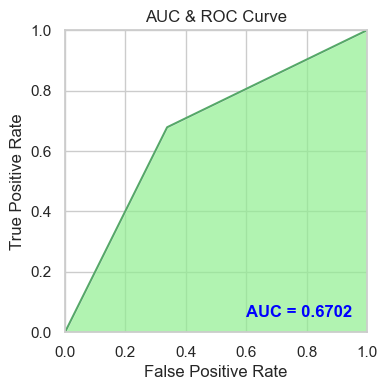

In [127]:
auc = metrics.roc_auc_score(os_y_test, os_y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(os_y_test, os_y_pred)

plt.figure(figsize=(5, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Hyper parameter Tuning 

In [128]:
np.geomspace(1e-5,1e5,num=20)

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

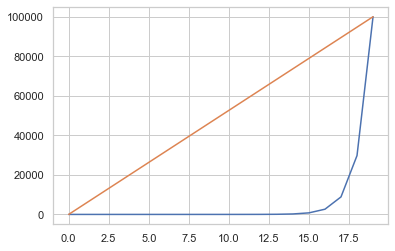

In [129]:
#Creating a range of values for lambda 

plt.plot(np.geomspace(1e-5,1e5,num=20))
plt.plot(np.linspace(1e-5,1e5,num=20))

In [130]:
C_list = np.geomspace(1e-5,1e5,num=20)
CAc = []
Log_loss = []
Auc = []

for c in C_list:
    logreg2=LogisticRegression(C = c)
    logreg2.fit(os_x_train,os_y_train)
    y_pred2=logreg2.predict(os_x_test) 
    #print("The f1 score for {} paramter is{}".format(c,metrics.f1_score(y_test,y_pred2)))
    CAc.append(metrics.f1_score(os_y_test,y_pred2)) #f1 score of models 
    Log_loss.append(metrics.log_loss(os_y_test,y_pred2))
    #print("The Log loss for {}  parameter is {}".format(c,metrics.log_loss(y_test,y_pred)))
    Auc.append(metrics.roc_auc_score(os_y_test, y_pred2))
    


In [131]:
#converting list to array

CAc2 = np.array(CAc).reshape(20,)
Log_loss2 = np.array(Log_loss).reshape(20,)
Auc = np.array(Auc).reshape(20,)
#zipping them together 

outcomes = zip(C_list,CAc2,Log_loss2,Auc)

#converting it to dataframe 

outcomes = pd.DataFrame(outcomes , columns = ["C_list" , "Classification_Acc" , "Log_loss" ,"Auc"])

In [132]:
outcomes = outcomes.sort_values("Log_loss",ascending=True)
outcomes

,C_list,Classification_Acc,Log_loss,Auc
0,0.000010,0.384365,10.264072,0.665292
1,0.000034,0.388626,10.508459,0.671758
10,1.832981,0.379412,11.458844,0.668303
17,8858.667904,0.360902,11.540300,0.647767
16,2636.650899,0.356612,11.757530,0.644060
11,6.158482,0.366032,11.757533,0.654696
14,233.572147,0.357459,11.811838,0.645260
7,0.048329,0.353461,11.920452,0.641279
15,784.759970,0.354319,11.974761,0.642480
8,0.162378,0.364419,12.029072,0.654317


In [133]:
#Another way of finding optimal c parameter using package offered by sklearn 
logreg3 = LogisticRegressionCV( Cs = C_list )
logreg3.fit(os_x_train,os_y_train)
y_pred3 = logreg3.predict(os_x_test)
print("The CAcc is  ",metrics.f1_score(os_y_test,y_pred3))
print("The log loss is " , metrics.log_loss(os_y_test,y_pred3))
print("The Auc is " ,metrics.roc_auc_score(os_y_test, y_pred3))
print("The optimal c parameter is ", logreg3.C_)


The CAcc is   0.39334341906202724
The log loss is  10.888616036391975
The Auc is  0.680161058742743
The optimal c parameter is  [0.16237767]


In [135]:
logreg3 = LogisticRegression( C = 0.000034	 )
logreg3.fit(os_x_train,os_y_train)
y_pred3 = logreg3.predict(os_x_test)
print("The CAcc is  ",metrics.f1_score(os_y_test,y_pred3))
print("The log loss is " , metrics.log_loss(os_y_test,y_pred3))
print("The Auc is " ,metrics.roc_auc_score(os_y_test, y_pred3))


The CAcc is   0.3888888888888889
The log loss is  10.752844748379847
The Auc is  0.6739688927091387


In [143]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1076
           1       0.27      0.61      0.37       196

    accuracy                           0.68      1272
   macro avg       0.59      0.65      0.58      1272
weighted avg       0.81      0.68      0.72      1272



In [1]:
cm = confusion_matrix(os_y_test, y_pred3)
sns.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")

NameError: name 'confusion_matrix' is not defined

In [144]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [145]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.6320754716981132 
 The Missclassification = 1-Accuracy =  0.3679245283018868 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.5612244897959183 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.6449814126394052 
 Positive Predictive value = TP/(TP+FP) =  0.22357723577235772 
 Negative predictive Value = TN/(TN+FN) =  0.8897435897435897 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  1.5808312853937385 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.6802917132270776


In [142]:
logreg3 = LogisticRegression( C = 0.000034	 ,class_weight="balanced")
logreg3.fit(X_train,y_train)
y_pred3 = logreg3.predict(X_test)